# Task 4: Insights and Recommendations

This notebook derives actionable insights from sentiment and thematic analyses of bank app reviews, visualizes key findings, and suggests practical app improvements.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [10]:
df = pd.read_csv('data/bank_reviews_with_sentiment.csv')
df_themes = pd.read_csv('data/bank_reviews_with_themes.csv')

In [ ]:
# Merge sentiment and theme data on common columns (review text)

df_merged = pd.merge(df, df_themes[['review', 'identified_themes']], on='review', how='left')

# Preview merged data
df_merged.head()


,review,rating,date,bank,source,sentiment_label,sentiment_score,identified_themes
0,the app is proactive and a good connections.,5,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999868,[]
1,I cannot send to cbebirr app. through this app.,3,2025-06-05,Commercial Bank of Ethiopia,Google Play,NEGATIVE,0.995335,[]
2,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999816,[]
3,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999816,[]
4,good,4,2025-06-05,Commercial Bank of Ethiopia,Google Play,POSITIVE,0.999816,[]


In [13]:
# Preview merged data
print(df_merged.info())
df_merged.head()

# Explode themes for counting and analysis
df_exploded = df_merged.explode('identified_themes')
print(df_exploded['identified_themes'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5406 entries, 0 to 5405
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review             5406 non-null   object 
 1   rating             5406 non-null   int64  
 2   date               5406 non-null   object 
 3   bank               5406 non-null   object 
 4   source             5406 non-null   object 
 5   sentiment_label    5406 non-null   object 
 6   sentiment_score    5406 non-null   float64
 7   identified_themes  5406 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 338.0+ KB
None
identified_themes
[]                                                                                                                             5141
['Transaction Performance']                                                                                                      50
['Feature Requests']                                           

In [14]:
# Count themes by bank and sentiment
theme_sentiment_counts = df_exploded.groupby(['bank', 'identified_themes', 'sentiment_label']).size().unstack(fill_value=0)

# Calculate proportions or highlight themes with strong positive or negative sentiment
theme_sentiment_counts['total'] = theme_sentiment_counts.sum(axis=1)
theme_sentiment_counts['positive_ratio'] = theme_sentiment_counts.get('POSITIVE', 0) / theme_sentiment_counts['total']
theme_sentiment_counts['negative_ratio'] = theme_sentiment_counts.get('NEGATIVE', 0) / theme_sentiment_counts['total']

theme_sentiment_counts.sort_values(by='negative_ratio', ascending=False).head(10)


sentiment_label                                                                 NEGATIVE  \
bank                        identified_themes                                              
Bank of Abyssinia           ['Account Access Issues', 'Feature Requests']              2   
                            ['Account Access Issues', 'Transaction Performa...         1   
                            ['Account Access Issues', 'Transaction Performa...         1   
                            ['Account Access Issues', 'User Interface & Exp...         2   
                            ['Transaction Performance', 'User Interface & E...         2   
                            ['Transaction Performance', 'User Interface & E...         2   
                            ['Transaction Performance', 'Feature Requests']            3   
                            ['Transaction Performance', 'Customer Support']            1   
Commercial Bank of Ethiopia ['Account Access Issues', 'Transaction Performa...         1   
                            ['Account Access Issues', 'Transaction Performa...         1   

sentiment_label                                                                 NEUTRAL  \
bank                        identified_themes                                             
Bank of Abyssinia           ['Account Access Issues', 'Feature Requests']             0   
                            ['Account Access Issues', 'Transaction Performa...        0   
                            ['Account Access Issues', 'Transaction Performa...        0   
                            ['Account Access Issues', 'User Interface & Exp...        0   
                            ['Transaction Performance', 'User Interface & E...        0   
                            ['Transaction Performance', 'User Interface & E...        0   
                            ['Transaction Performance', 'Feature Requests']           0   
                            ['Transaction Performance', 'Customer Support']           0   
Commercial Bank of Ethiopia ['Account Access Issues', 'Transaction Performa...        0   
                            ['Account Access Issues', 'Transaction Performa...        0   

sentiment_label                                                                 POSITIVE  \
bank                        identified_themes                                              
Bank of Abyssinia           ['Account Access Issues', 'Feature Requests']              0   
                            ['Account Access Issues', 'Transaction Performa...         0   
                            ['Account Access Issues', 'Transaction Performa...         0   
                            ['Account Access Issues', 'User Interface & Exp...         0   
                            ['Transaction Performance', 'User Interface & E...         0   
                            ['Transaction Performance', 'User Interface & E...         0   
                            ['Transaction Performance', 'Feature Requests']            0   
                            ['Transaction Performance', 'Customer Support']            0   
Commercial Bank of Ethiopia ['Account Access Issues', 'Transaction Performa...         0   
                            ['Account Access Issues', 'Transaction Performa...         0   

sentiment_label                                                                 total  \
bank                        identified_themes                                           
Bank of Abyssinia           ['Account Access Issues', 'Feature Requests']           2   
                            ['Account Access Issues', 'Transaction Performa...      1   
                            ['Account Access Issues', 'Transaction Performa...      1   
                            ['Account Access Issues', 'User Interface & Exp...      2   
                            ['Transaction Performance', 'User Interface & E...      2   
                            ['Transaction Performance', 'User Interface & 

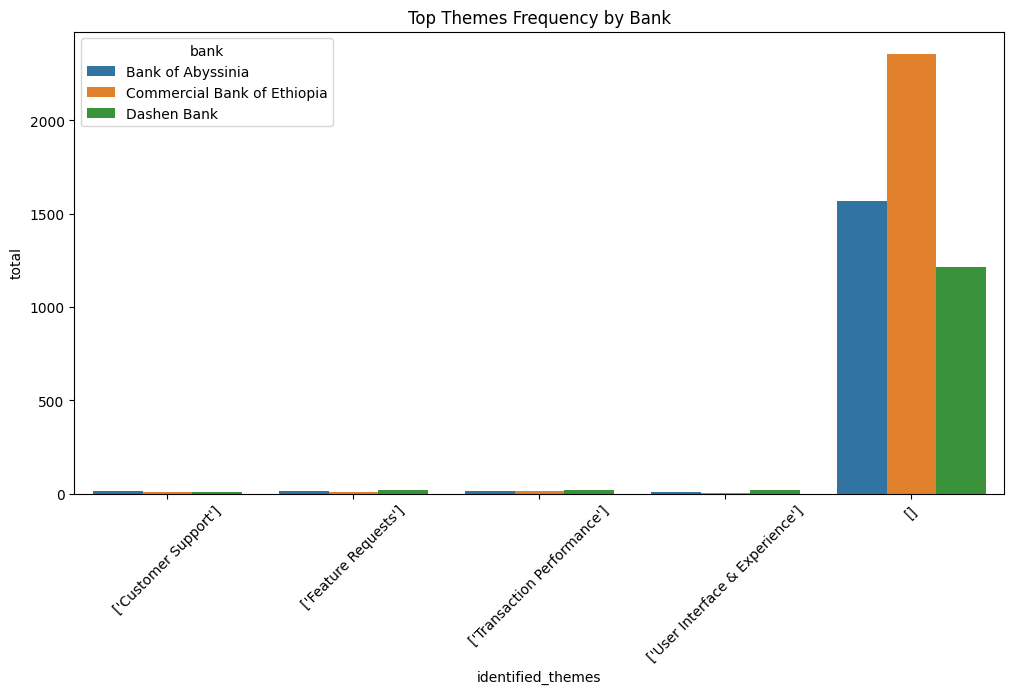

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter themes with enough data
top_themes = theme_sentiment_counts.reset_index().groupby('identified_themes')['total'].sum().sort_values(ascending=False).head(5).index

plot_data = theme_sentiment_counts.reset_index()
plot_data = plot_data[plot_data['identified_themes'].isin(top_themes)]

plt.figure(figsize=(12,6))
sns.barplot(data=plot_data, x='identified_themes', y='total', hue='bank')
plt.title('Top Themes Frequency by Bank')
plt.xticks(rotation=45)
plt.show()


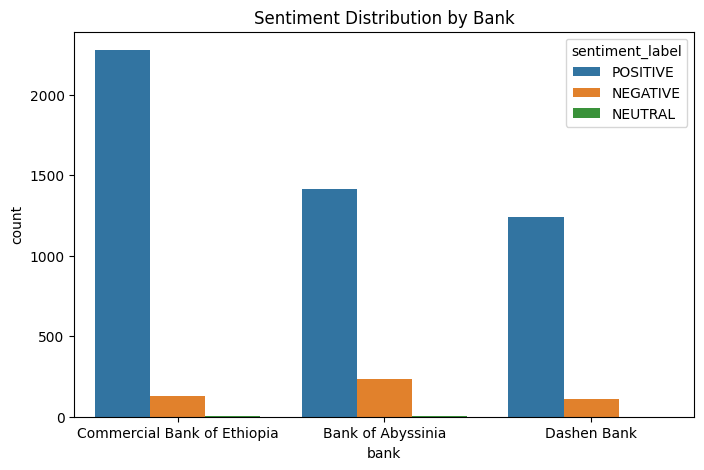

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_merged, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.show()


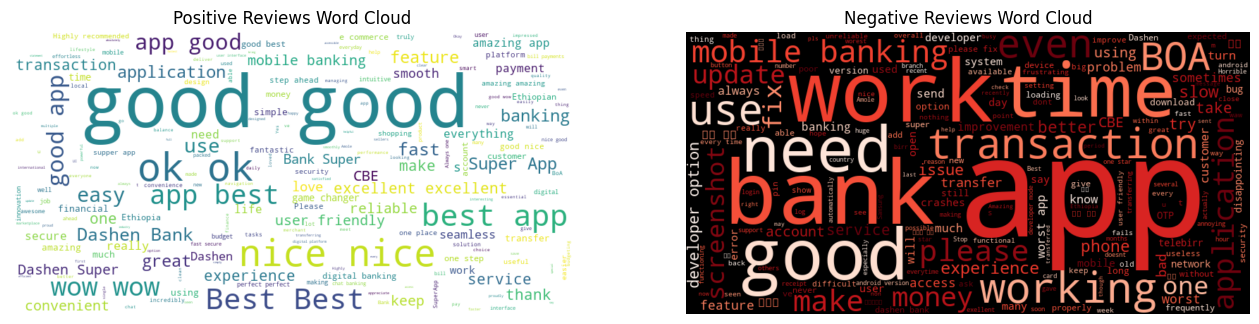

In [17]:
from wordcloud import WordCloud

positive_text = ' '.join(df_merged[df_merged['sentiment_label'] == 'POSITIVE']['review'])
negative_text = ' '.join(df_merged[df_merged['sentiment_label'] == 'NEGATIVE']['review'])

wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Positive Reviews Word Cloud')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Negative Reviews Word Cloud')
plt.axis('off')

plt.show()


In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_merged, x='bank', hue='sentiment_label')
plt.title('Sentiment Distribution by Bank')
plt.savefig('figures/sentiment_distribution_by_bank.png')
plt.close()
